In [541]:
## how to save a model in ML using Picklel
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import style

In [542]:
## load the data
data_path = '/home/topol/Desktop/ML/notebooks/student+performance/student/student-por.csv'

df = pd.read_csv(data_path, sep= ';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Simple numerical attributs:
#### `sex` == student's sex (binary: 'F' - female or 'M' - male)
#### `age` == student's age (numeric: from 15 to 22)
#### `G1, G2, G3` == grades(marks) related to course, Math or Portuguese
#### `studytime` == weekly study time: 1-<2 hr, 2-5 hr, 3,5-10 hr, or 4->10 hr
#### `failures` == number of past class failures (numeric: n if 1<=n<3, else 4)
#### `absences` == number of school absences (numeric: from 0 to 93)

In [543]:
## numericall attributes are easy to work with
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'age', 'sex']]

In [544]:
df.head(50)

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,F
1,9,11,11,2,0,2,17,F
2,12,13,12,2,0,6,15,F
3,14,14,14,3,0,0,15,F
4,11,13,13,2,0,0,16,F
5,12,12,13,2,0,6,16,M
6,13,12,13,2,0,0,16,M
7,10,13,13,2,0,2,17,F
8,15,16,17,2,0,0,15,M
9,12,12,13,2,0,0,15,M


In [545]:
df.dtypes

G1            int64
G2            int64
G3            int64
studytime     int64
failures      int64
absences      int64
age           int64
sex          object
dtype: object

In [546]:
## preprocess or data cleaning
df.isna()

,G1,G2,G3,studytime,failures,absences,age,sex
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False


In [547]:
df = df.copy()

In [548]:
#df['sex'].sum() ## sum cannot be done on non numericals

In [549]:
## convert binary F and M to 0 or 1
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [550]:
df['sex'].sum()

np.int64(266)

In [551]:
df.head(50)

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,0
1,9,11,11,2,0,2,17,0
2,12,13,12,2,0,6,15,0
3,14,14,14,3,0,0,15,0
4,11,13,13,2,0,0,16,0
5,12,12,13,2,0,6,16,1
6,13,12,13,2,0,0,16,1
7,10,13,13,2,0,2,17,0
8,15,16,17,2,0,0,15,1
9,12,12,13,2,0,0,15,1


In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         649 non-null    int64
 1   G2         649 non-null    int64
 2   G3         649 non-null    int64
 3   studytime  649 non-null    int64
 4   failures   649 non-null    int64
 5   absences   649 non-null    int64
 6   age        649 non-null    int64
 7   sex        649 non-null    int64
dtypes: int64(8)
memory usage: 40.7 KB


In [553]:
print(df)

     G1  G2  G3  studytime  failures  absences  age  sex
0     0  11  11          2         0         4   18    0
1     9  11  11          2         0         2   17    0
2    12  13  12          2         0         6   15    0
3    14  14  14          3         0         0   15    0
4    11  13  13          2         0         0   16    0
..   ..  ..  ..        ...       ...       ...  ...  ...
644  10  11  10          3         1         4   19    0
645  15  15  16          2         0         4   18    0
646  11  12   9          2         0         6   18    0
647  10  10  10          1         0         6   17    1
648  10  11  11          1         0         4   18    1

[649 rows x 8 columns]


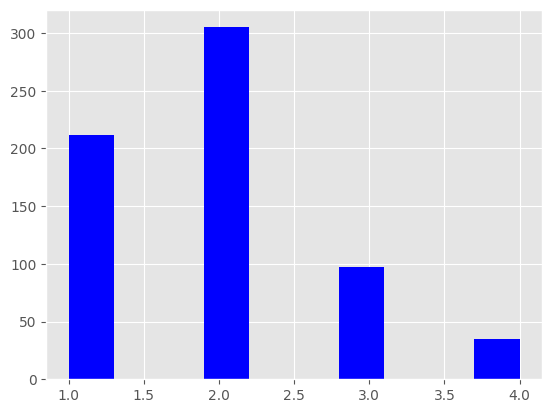

In [554]:
## plot the data to get clear understanding
plt.hist(df['studytime'], color= 'b')


plt.show()

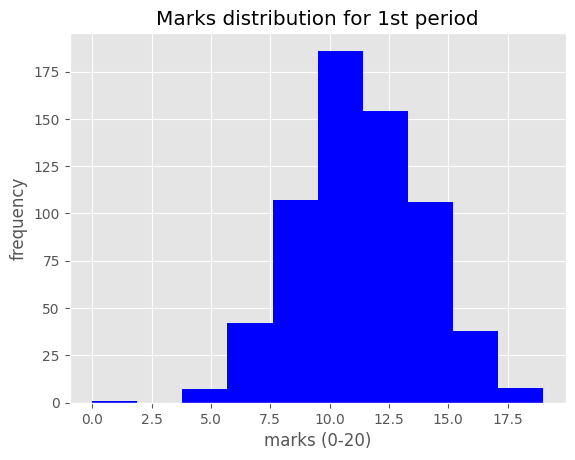

In [555]:
plt.hist(df['G1'], color= 'b')  # G1 - first period grade: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

In [527]:
plt.hist(df['G2'], color= 'b')    # G2 - 2nd period grades: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

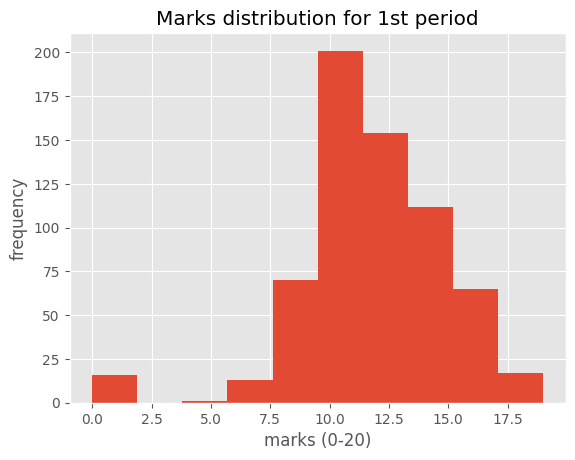

In [528]:
plt.hist(df['G3'], color= 'b')  # G3 - last period grade: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

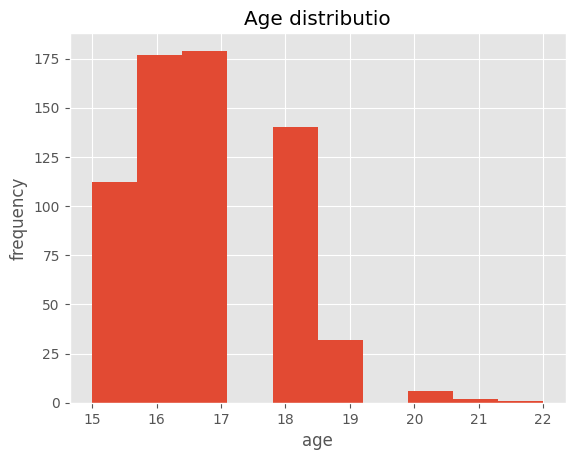

In [529]:
plt.hist(df['age'], color= 'b') 
plt.title('Age distributio')
plt.xlabel('age')
plt.ylabel('frequency')

plt.show()

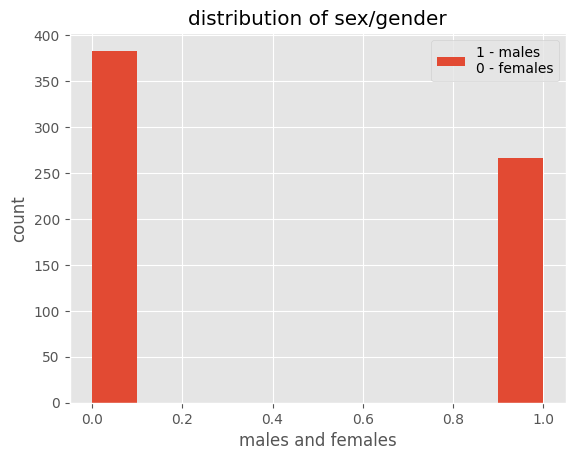

In [530]:
plt.hist(df['sex'], color= 'b', label= '1 - males \n0 - females')
plt.title('distribution of sex/gender')
plt.xlabel('males and females')
plt.ylabel('count')

plt.legend()
plt.show()

In [531]:
#plt.scatter(df['age'], df['G1'], color= 'skyblue')
#plt.title('age vs grades')
#plt.xlabel('Age')
#plt.ylabel('Grades')

#plt.show()

#### Split data and Evaluate the model

In [532]:
## predict the attribute G3 (final)
pred = 'G3'             # what we want to achieve/ often called 'label'
X = np.array(df.drop([pred], axis= 1))
y = np.array(df[pred])

In [533]:
## train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.9)   # 90% on training and 10 on testing

In [534]:
## Lets create a model
l_model = linear_model.LinearRegression()

In [535]:
## accuracy
l_model.fit(X_train, y_train)
accuracy = l_model.score(X_test, y_test)

print(accuracy)

0.8504552693203187


In [536]:
## find parameters/ constants
print('coefficient: \n', l_model.coef_)
print('intercept: \n', l_model.intercept_)

coefficient: 
 [ 0.14292319  0.87214456  0.01799393 -0.24833435  0.01904939  0.03502599
 -0.1734227 ]
intercept: 
 -0.3674730468532452


### Testing

In [537]:
## test and compare
predictions = l_model.predict(X_test)

for x in range(len(predictions)):
    print(predictions[X], X_test[X], y_test[X])

[[13.16666905 13.31691412 14.66659908 ... 13.34009174  9.22161714
  13.16666905]
 [10.14176053 13.31691412 14.66659908 ... 14.66659908 11.45716764
  13.16666905]
 [ 0.73239105  7.32756693 14.66659908 ... 11.31755551  9.35510755
  13.16666905]
 ...
 [13.31691412  0.73239105 14.66659908 ... 11.31755551  9.22161714
  13.16666905]
 [ 8.96314166  8.96314166 17.23960557 ... 11.31755551 11.45716764
  17.23960557]
 [ 8.96314166 13.31691412 17.23960557 ... 13.34009174  9.22161714
  17.23960557]] [[[12 13  1 ...  4 16  1]
  [12 13  2 ...  0 17  0]
  [16 14  2 ...  6 16  1]
  ...
  [12 13  1 ...  4 16  0]
  [ 8  9  2 ...  0 16  0]
  [12 13  1 ...  4 16  1]]

 [[ 9 10  2 ... 21 21  1]
  [12 13  2 ...  0 17  0]
  [16 14  2 ...  6 16  1]
  ...
  [16 14  2 ...  6 16  1]
  [10 11  3 ...  8 17  0]
  [12 13  1 ...  4 16  1]]

 [[ 8  0  2 ...  0 19  0]
  [ 7  7  2 ...  9 18  0]
  [16 14  2 ...  6 16  1]
  ...
  [11 11  1 ...  6 16  1]
  [10  9  3 ...  2 15  1]
  [12 13  1 ...  4 16  1]]

 ...

 [[12 13  

[[[12 13  1 ...  4 16  1]
  [12 13  2 ...  0 17  0]
  [16 14  2 ...  6 16  1]
  ...
  [12 13  1 ...  4 16  0]
  [ 8  9  2 ...  0 16  0]
  [12 13  1 ...  4 16  1]]

 [[ 9 10  2 ... 21 21  1]
  [12 13  2 ...  0 17  0]
  [16 14  2 ...  6 16  1]
  ...
  [16 14  2 ...  6 16  1]
  [10 11  3 ...  8 17  0]
  [12 13  1 ...  4 16  1]]

 [[ 8  0  2 ...  0 19  0]
  [ 7  7  2 ...  9 18  0]
  [16 14  2 ...  6 16  1]
  ...
  [11 11  1 ...  6 16  1]
  [10  9  3 ...  2 15  1]
  [12 13  1 ...  4 16  1]]

 ...

 [[12 13  2 ...  0 17  0]
  [ 8  0  2 ...  0 19  0]
  [16 14  2 ...  6 16  1]
  ...
  [11 11  1 ...  6 16  1]
  [ 8  9  2 ...  0 16  0]
  [12 13  1 ...  4 16  1]]

 [[ 8  9  1 ...  4 19  1]
  [ 8  9  1 ...  4 19  1]
  [14 17  3 ...  5 18  0]
  ...
  [11 11  1 ...  6 16  1]
  [10 11  3 ...  8 17  0]
  [14 17  3 ...  5 18  0]]

 [[ 8  9  1 ...  4 19  1]
  [12 13  2 ...  0 17  0]
  [14 17  3 ...  5 18  0]
  ...
  [12 13  1 ...  4 16  0]
  [ 8  9  2 ...  0 16  0]
  [14 17  3 ...  5 18  0]]] [[13 15 14

#### SAVE THE MODEL OR TRAIN MULTIPLES AND SAVE BEST ONE

In [538]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(l_model, f)
    
pickle_in = open('studentmodel.pickle', 'rb')
l_model = pickle.load(pickle_in)

In [539]:
### All the code combined


## train and test sets
"""best = 0
for _ in range(30):
    
    X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.9)   # 90% on training and 10 on testing


    ## Lets create a model
    l_model = linear_model.LinearRegression()


    ## accuracy
    l_model.fit(X_train, y_train)
    accuracy = l_model.score(X_test, y_test)

    print(accuracy) 
    
    if accuracy > best: 
       best = accuracy
       with open('studentmodel.pickle', 'wb') as f: 
           pickle.dump(l_model, f) """



"best = 0\nfor _ in range(30):\n    \n    X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.9)   # 90% on training and 10 on testing\n\n\n    ## Lets create a model\n    l_model = linear_model.LinearRegression()\n\n\n    ## accuracy\n    l_model.fit(X_train, y_train)\n    accuracy = l_model.score(X_test, y_test)\n\n    print(accuracy) \n    \n    if accuracy > best: \n       best = accuracy\n       with open('studentmodel.pickle', 'wb') as f: \n           pickle.dump(l_model, f) "

In [ ]:
## plot and compare
p = 'G1'
style.use('ggplot')
plt.scatter(p, df['G3'])
plt.xlabel('G1')


plt.show()